# CNN for Food and Non-Food Classifier

In [0]:
!ls

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install keras_sequential_ascii

  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-cp36-none-any.whl size=3062 sha256=a507a56f3882770ec541645cdfe0f2f6dec3d0393851cf0f7b4c647bfe557013
  Stored in directory: /root/.cache/pip/wheels/f5/8d/81/912666dff82a923ce423a7e797cd75f54271c7031512cdb282
Successfully built keras-sequential-ascii


In [4]:
!pip install livelossplot

In [5]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam, Adadelta, RMSprop, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import livelossplot
%matplotlib inline
plot_losses = livelossplot.PlotLossesKeras()

Using TensorFlow backend.


In [6]:
PATH = '/content/drive/My Drive/Research_Monkey_dataset/10-monkey-species/'
train_path = '%straining/' %PATH
valid_path = '%svalidation/' %PATH
#test_path = '%sevaluation/' %PATH

#classes = ('food', 'non-food')
classes = ('alouatta_palliata', 'erythrocebus_patas','cacajao_calvus','macaca_fuscata','cebuella_pygmea','cebus_capucinus','mico_argentatus','saimiri_sciureus','aotus_nigriceps','trachypithecus_johnii ')
print (train_path)

/content/drive/My Drive/Research_Monkey_dataset/10-monkey-species/training/


In [7]:
#Apply data augmentation technique
train_batches = ImageDataGenerator(rescale = 1./255, shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        horizontal_flip=True,width_shift_range=0.1,vertical_flip=True,rotation_range=40,validation_split=0.2).flow_from_directory(train_path, target_size=(224,224), 
        class_mode='categorical', batch_size=64)
valid_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(valid_path, target_size=(224,224), 
        class_mode='categorical', batch_size=32)
#test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224), 
#        class_mode='categorical', batch_size=32)

nb_train_samples = 1013
nb_validation_samples = 272

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


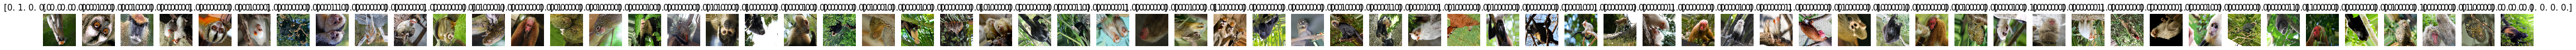

In [8]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(80,60), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        #print(ims[0])
        #ims = np.array(ims).astype(np.uint8)
        #print(ims)
        
        if (ims.shape[-1] != 3):
            ims = ims.transpose((1,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=15)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

# Build and train CNN_previous(DON'T)

In [0]:
pool_size = (2, 2)                  # size of pooling area for max pooling
prob_drop_conv = 0.2                # drop probability for dropout @ conv layer
prob_drop_hidden = 0.5              # drop probability for dropout @ fc layer

# Convolutional model
model = Sequential()

#initializer = initializers.random_normal(stddev=0.02)
initializer = 'normal'

# conv1 layer
model.add(Conv2D(100, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_initializer=initializer))
model.add(MaxPooling2D(pool_size=pool_size ))
#model.add(Dropout(0.3))

# conv2 layer
model.add(Conv2D(200, (3, 3), activation='relu', kernel_initializer=initializer))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.3))

# conv3 layer
model.add(Conv2D(300, (3, 3), activation='relu', kernel_initializer=initializer))
model.add(MaxPooling2D(pool_size=pool_size ))
model.add(Flatten())
#model.add(Dropout(0.3))

# fc1 layer
model.add(Dense(500, activation='relu', kernel_initializer=initializer))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(10, activation='relu', kernel_initializer=initializer))
model.add(Dropout(prob_drop_hidden))

# fc3 layer
model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))

model.summary()

# Build and train CNN 1

> Indented block



In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# Vizualizing model structure

sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    224  224    3
              Conv2D    \|/  -------------------       896     0.0%
                relu   #####    222  222   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####    111  111   32
              Conv2D    \|/  -------------------      9248     0.0%
                relu   #####    109  109   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     54   54   32
              Conv2D    \|/  -------------------     18496     0.1%
                relu   #####     54   54   64
              Conv2D    \|/  -------------------     36928     0.2%
                relu   #####     52   52   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     26   26   64
             Dropout    | || -------------------         0     0.0%
              

In [11]:
#model.compile(Adadelta(), loss='binary_crossentropy', metrics=['accuracy', 'mean_squared_error'])
#model.compile(RMSprop(), loss='binary_crossentropy', metrics=['accuracy', 'mean_squared_error'])
##model.compile(SGD(lr=0.001,momentum=0.01,nesterov=True), loss='binary_crossentropy', metrics=['accuracy', 'mean_squared_error'])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', 'mean_squared_error'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 54, 54, 64)     

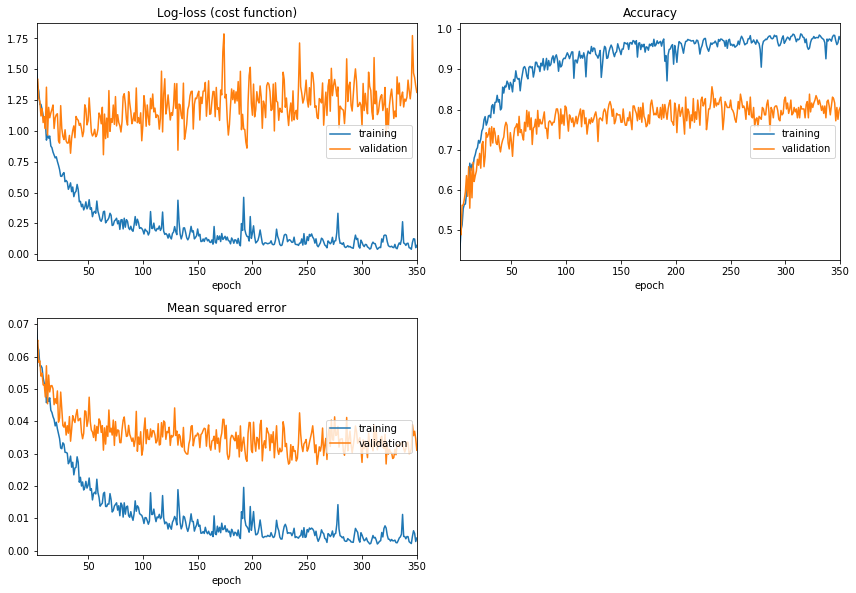

Log-loss (cost function):
training   (min:    0.040, max:    2.287, cur:    0.071)
validation (min:    0.807, max:    1.820, cur:    1.313)

Accuracy:
training   (min:    0.180, max:    0.988, cur:    0.975)
validation (min:    0.397, max:    0.857, cur:    0.805)

Mean squared error:
training   (min:    0.002, max:    0.089, cur:    0.004)
validation (min:    0.027, max:    0.076, cur:    0.031)


In [12]:
'''
history = model.fit_generator(train_batches, steps_per_epoch=32, #steps_per_epoch=nb_train_samples, 
                         callbacks=[plot_losses],
                              validation_steps = 32,
                    validation_data=valid_batches, epochs=50, verbose=2)
'''

batch_size = 32
epochs = 350

history = model.fit_generator(train_batches,
                         steps_per_epoch = nb_train_samples//batch_size,
                         epochs = epochs,
                         callbacks=[plot_losses],
                         validation_data = valid_batches,
                                  verbose = 1)


In [13]:
# Evaluate
x_test, y_test = valid_batches[0]
evaluation = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

32/32 [==============================] - 0s 543us/step
Summary: Loss over the test dataset: 1.56, Accuracy: 0.88


dict_keys(['val_loss', 'val_acc', 'val_mean_squared_error', 'loss', 'acc', 'mean_squared_error'])


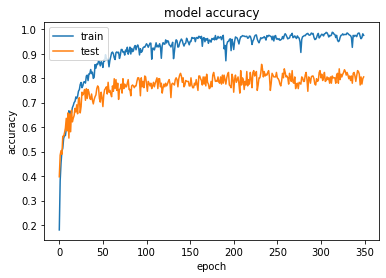

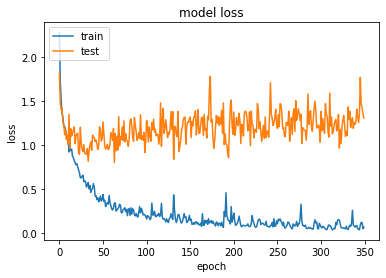

In [14]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/Research_Monkey_dataset/10-monkey-species/model_accuracy.png')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/Research_Monkey_dataset/10-monkey-species/model_loss.png')
plt.show()

In [15]:
model.evaluate_generator(valid_batches, nb_validation_samples)

[1.3118745131990672, 0.8056906614785992, 0.03100120577986573]

In [0]:
a = []
while(1):
    a.append("1")

KeyboardInterrupt: ignored